# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['NA20768', 'NA20582', 'NA20816', 'NA20814', 'NA20806', 'NA20796', 'NA20811', 'NA20510', 'NA20798', 'NA20540', 'NA20581', 'NA20753', 'NA20517', 'NA20787', 'NA20762', 'NA20521', 'NA20505', 'NA20831', 'NA20515', 'NA20534', 'NA20773', 'NA20503', 'NA20514', 'NA20532', 'NA20828', 'NA20512', 'NA20801', 'NA20827', 'NA20770', 'NA20805', 'NA20821', 'NA20774', 'NA20758', 'NA20799', 'NA20541', 'NA20756', 'NA20588', 'NA20809', 'NA20542', 'NA20544', 'NA20520', 'NA20763', 'NA20513', 'NA20509', 'NA20516', 'NA20535', 'NA20766', 'NA20778', 'NA20807', 'NA20539', 'NA20528', 'NA20790', 'NA20533', 'NA20538', 'NA20765', 'NA20529', 'NA20537', 'NA20819', 'NA20536', 'NA20795', 'NA20818', 'NA20803', 'NA20527', 'NA20772', 'NA20585', 'NA20589', 'NA20531', 'NA20760', 'NA20800', 'NA20587', 'NA20769', 'NA20524', 'NA20530', 'NA20759', 'NA20826', 'NA20504', 'NA20757', 'NA20764', 'NA20586', 'NA20752', 'NA20802', 'NA20785', 'NA20783', 'NA20786', 'NA20543', 'NA20810', 'NA20755', 'NA20812', 'NA20522', 'NA20832', 'NA20507', 'NA20519', 'NA20771', 'NA20761', 'NA20808', 'NA20792', 'NA20754', 'NA20813', 'NA20518', 'NA20815', 'NA20767', 'NA20525', 'NA20775', 'NA20804', 'NA20797', 'NA20502', 'NA20506', 'NA20822']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/TSI/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/TSI/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822,gene
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,1,0,1,0,0,0,1,0,0,...,1,1,1,0,0,0,0,0,1,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20518,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,0,19,3,33,35,3,5,36,3,...,3,6,33,6,5,28,6,6,5,3
ANG,15,15,6,5,13,8,6,1,0,12,...,0,11,0,0,0,1,1,8,5,5
ATXN2,10,8,9,9,15,9,11,12,8,8,...,21,9,9,25,18,10,15,10,18,15
C19ORF12,18,8,12,9,10,20,8,7,9,7,...,10,8,10,10,7,10,17,8,10,13
C9ORF72,30,9,10,10,10,9,22,31,23,32,...,32,35,31,12,31,13,11,31,24,9


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
NA20768,12.060606
NA20582,7.696970
NA20816,11.090909
NA20814,12.333333
NA20806,12.181818


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20518,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822
0,12.060606,7.69697,11.090909,12.333333,12.181818,13.252525,13.424242,13.707071,11.252525,13.080808,...,15.333333,11.686869,10.767677,9.949495,13.59596,16.333333,14.080808,12.979798,15.313131,11.636364


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20518,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822
mean99,12.060606,7.69697,11.090909,12.333333,12.181818,13.252525,13.424242,13.707071,11.252525,13.080808,...,15.333333,11.686869,10.767677,9.949495,13.59596,16.333333,14.080808,12.979798,15.313131,11.636364


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20518,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822
count,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,33.166667,21.166667,30.500000,33.916667,33.50000,36.444444,36.916667,37.694444,30.944444,35.972222,...,42.166667,32.138889,29.611111,27.361111,37.388889,44.916667,38.722222,35.694444,42.111111,32.000000
std,120.405149,68.068663,101.401747,123.182182,110.89725,129.209121,148.453817,137.090548,129.490638,161.644493,...,162.679615,113.661943,100.647412,105.033642,142.794413,176.153565,146.013035,137.228031,163.406029,111.457615
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,3.000000,1.75000,1.000000,1.750000,1.750000,2.000000,1.000000,...,2.000000,1.000000,1.750000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20518,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822
ALS2,7.000000,0.000000,19.000000,3.000000,33.000000,35.000000,3.000000,5.000000,36.000000,3.000000,...,3.000000,6.000000,33.000000,6.000000,5.000000,28.000000,6.000000,6.000000,5.000000,3.000000
ANG,15.000000,15.000000,6.000000,5.000000,13.000000,8.000000,6.000000,1.000000,0.000000,12.000000,...,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,5.000000,5.000000
ATXN2,10.000000,8.000000,9.000000,9.000000,15.000000,9.000000,11.000000,12.000000,8.000000,8.000000,...,21.000000,9.000000,9.000000,25.000000,18.000000,10.000000,15.000000,10.000000,18.000000,15.000000
C19ORF12,18.000000,8.000000,12.000000,9.000000,10.000000,20.000000,8.000000,7.000000,9.000000,7.000000,...,10.000000,8.000000,10.000000,10.000000,7.000000,10.000000,17.000000,8.000000,10.000000,13.000000
C9ORF72,30.000000,9.000000,10.000000,10.000000,10.000000,9.000000,22.000000,31.000000,23.000000,32.000000,...,32.000000,35.000000,31.000000,12.000000,31.000000,13.000000,11.000000,31.000000,24.000000,9.000000
CHCHD10,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000
CHMP2B,10.000000,10.000000,10.000000,13.000000,1.000000,9.000000,16.000000,10.000000,11.000000,20.000000,...,12.000000,16.000000,10.000000,3.000000,16.000000,14.000000,12.000000,15.000000,10.000000,17.000000
CHRNA3,15.000000,17.000000,14.000000,28.000000,23.000000,22.000000,17.000000,28.000000,8.000000,13.000000,...,14.000000,13.000000,23.000000,16.000000,20.000000,26.000000,28.000000,13.000000,21.000000,8.000000
CREST,6.000000,5.000000,2.000000,87.000000,3.000000,9.000000,81.000000,2.000000,3.000000,1.000000,...,1.000000,1.000000,32.000000,4.000000,1.000000,3.000000,3.000000,122.000000,3.000000,3.000000
DAO,3.000000,2.000000,0.000000,4.000000,4.000000,1.000000,0.000000,2.000000,7.000000,3.000000,...,3.000000,8.000000,1.000000,6.000000,2.000000,8.000000,0.000000,6.000000,8.000000,7.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,108.0,12.083333,12.940645,0.0,3.00,6.0,19.50,46.0
ANG,108.0,5.296296,5.410718,0.0,0.00,5.0,11.00,18.0
ATXN2,108.0,12.444444,4.090868,7.0,9.00,11.0,15.00,29.0
C19ORF12,108.0,9.092593,3.618584,2.0,7.00,8.0,10.00,20.0
C9ORF72,108.0,17.870370,10.022491,0.0,10.00,15.0,25.00,37.0
CHCHD10,108.0,1.925926,0.893420,0.0,1.00,2.0,3.00,4.0
CHMP2B,108.0,10.648148,4.872802,0.0,9.00,10.0,13.00,28.0
CHRNA3,108.0,20.407407,6.844108,5.0,15.00,20.5,28.00,30.0
CREST,108.0,19.759259,32.154379,0.0,2.00,4.0,14.00,136.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20506,NA20822,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,0,19,3,33,35,3,5,36,3,...,5,3,108.0,12.083333,12.940645,0.0,3.0,6.0,19.5,46.0
ANG,15,15,6,5,13,8,6,1,0,12,...,5,5,108.0,5.296296,5.410718,0.0,0.0,5.0,11.0,18.0
ATXN2,10,8,9,9,15,9,11,12,8,8,...,18,15,108.0,12.444444,4.090868,7.0,9.0,11.0,15.0,29.0
C19ORF12,18,8,12,9,10,20,8,7,9,7,...,10,13,108.0,9.092593,3.618584,2.0,7.0,8.0,10.0,20.0
C9ORF72,30,9,10,10,10,9,22,31,23,32,...,24,9,108.0,17.870370,10.022491,0.0,10.0,15.0,25.0,37.0


In [23]:
rdf

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20506,NA20822,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,0,19,3,33,35,3,5,36,3,...,5,3,108.0,12.083333,12.940645,0.0,3.00,6.0,19.50,46.0
ANG,15,15,6,5,13,8,6,1,0,12,...,5,5,108.0,5.296296,5.410718,0.0,0.00,5.0,11.00,18.0
ATXN2,10,8,9,9,15,9,11,12,8,8,...,18,15,108.0,12.444444,4.090868,7.0,9.00,11.0,15.00,29.0
C19ORF12,18,8,12,9,10,20,8,7,9,7,...,10,13,108.0,9.092593,3.618584,2.0,7.00,8.0,10.00,20.0
C9ORF72,30,9,10,10,10,9,22,31,23,32,...,24,9,108.0,17.870370,10.022491,0.0,10.00,15.0,25.00,37.0
CHCHD10,2,2,0,1,2,1,1,2,2,2,...,1,1,108.0,1.925926,0.893420,0.0,1.00,2.0,3.00,4.0
CHMP2B,10,10,10,13,1,9,16,10,11,20,...,10,17,108.0,10.648148,4.872802,0.0,9.00,10.0,13.00,28.0
CHRNA3,15,17,14,28,23,22,17,28,8,13,...,21,8,108.0,20.407407,6.844108,5.0,15.00,20.5,28.00,30.0
CREST,6,5,2,87,3,9,81,2,3,1,...,3,3,108.0,19.759259,32.154379,0.0,2.00,4.0,14.00,136.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,219
ANG,48
ATXN2,255
C19ORF12,67
C9ORF72,119
CHCHD10,11
CHMP2B,87
CHRNA3,95
CREST,278


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,5197
1,NEK1,758
2,FIG4,408
3,SETX,357
4,CREST,278
5,ATXN2,255
6,VAPB,239
7,SPG11,233
8,ELP3,228
9,ALS2,219


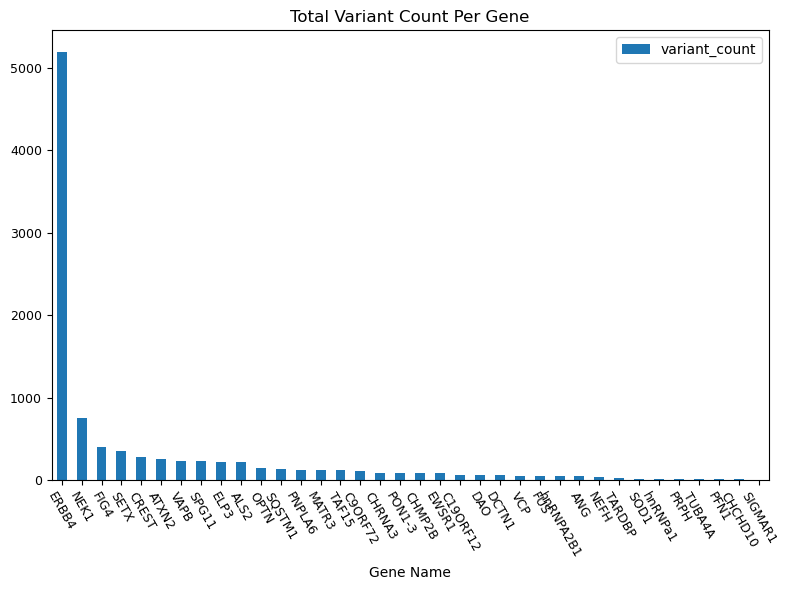

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'CREST']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,NA20768,1194
1,NA20582,762
2,NA20816,1098
3,NA20814,1221
4,NA20806,1206


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1278.0462962962963), 222.93439730147765)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

17

In [39]:
len(bottom_genomes)

14

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,NA20768,NA20582,NA20816,NA20814,NA20806,NA20796,NA20811,NA20510,NA20798,NA20540,...,NA20518,NA20815,NA20767,NA20525,NA20775,NA20804,NA20797,NA20502,NA20506,NA20822
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,7,0,19,3,33,35,3,5,36,3,...,3,6,33,6,5,28,6,6,5,3
ANG,15,15,6,5,13,8,6,1,0,12,...,0,11,0,0,0,1,1,8,5,5
ATXN2,10,8,9,9,15,9,11,12,8,8,...,21,9,9,25,18,10,15,10,18,15
C19ORF12,18,8,12,9,10,20,8,7,9,7,...,10,8,10,10,7,10,17,8,10,13
C9ORF72,30,9,10,10,10,9,22,31,23,32,...,32,35,31,12,31,13,11,31,24,9


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,NA20505,NA20534,NA20532,NA20828,NA20778,NA20772,NA20760,NA20800,NA20826,NA20543,NA20812,NA20522,NA20832,NA20813,NA20518,NA20804,NA20506
gene,,,,,,,,,,,,,,,,,
ERBB4,1369,1126,1257,1339,960,1045,1281,1216,1093,982,1132,1095,981,1192,967,1052,977
NEK1,44,193,41,13,46,322,226,67,10,194,212,8,213,45,220,208,191
FIG4,51,13,21,52,56,34,36,39,37,33,73,36,51,70,23,37,37
SETX,53,54,23,8,46,25,22,7,22,40,52,61,6,12,20,42,8
CREST,6,3,87,4,136,0,37,3,88,32,2,3,1,2,1,3,3


In [46]:
tgdf_bot_genomes.head()

,NA20582,NA20581,NA20542,NA20513,NA20533,NA20527,NA20585,NA20757,NA20802,NA20783,NA20519,NA20771,NA20792,NA20525
gene,,,,,,,,,,,,,,
ERBB4,410,474,638,474,394,610,645,468,568,549,544,617,573,636
NEK1,47,6,8,40,191,10,9,190,41,47,48,43,39,47
FIG4,55,23,36,28,20,51,5,57,55,23,62,56,36,38
SETX,6,54,48,25,29,23,49,6,10,23,5,8,3,13
CREST,5,3,7,2,2,4,6,1,5,4,4,1,6,4


## Plot stacked bar chart for top genes & top genomes

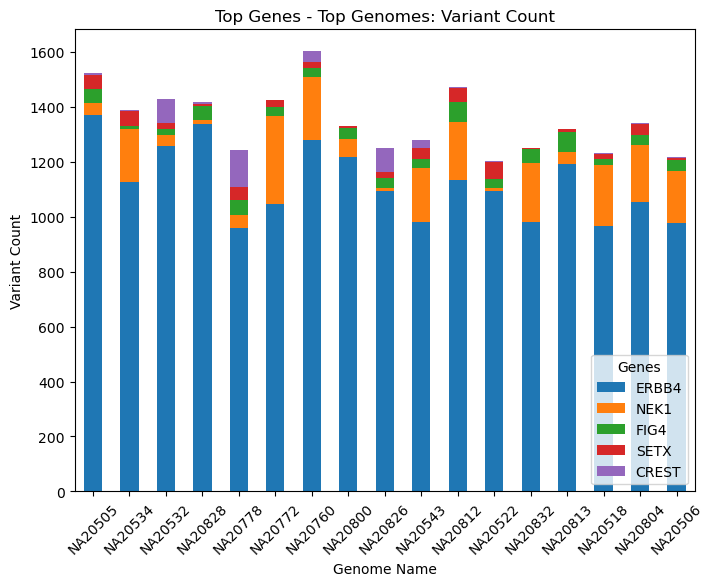

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

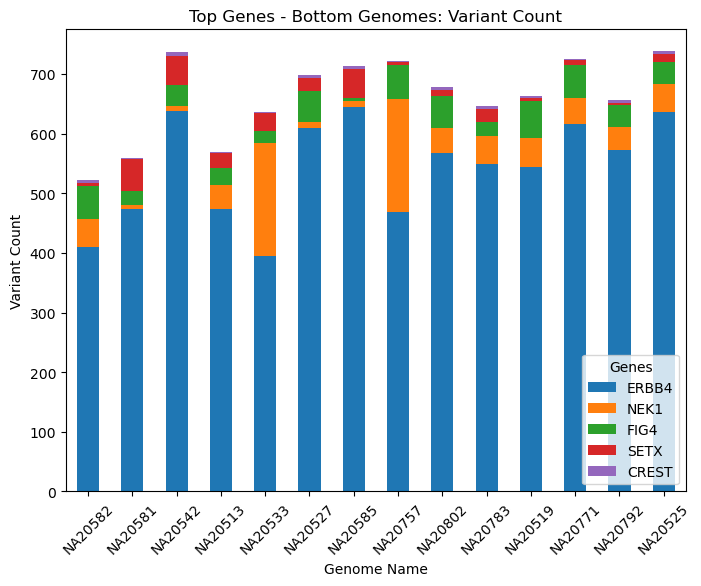

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()